## Libraries

For creating this chart, we will need to load the following libraries:

- [matplotlib](https://python-graph-gallery.com) for creatin the chart


In [1]:
import matplotlib.pyplot as plt

# set a higher resolution
plt.rcParams['figure.dpi'] = 200

## Coordinates

[Matplotlib](/matplotlib) provides a way to change and specify which coordinates system to use with exhaustive possibilites:

- the figure?
- the axes?
- the data?
- other?

In order to **change the coordinate system**, you have to change the `transform` argument of the `text()` function. Here are the possibilities:

- `ax.transData`: the data coordinates
- `ax.transAxes`: the axes coordinates
- `fig.transFigure`: the figure coordinates
- `fig.dpi_scale_trans`: physical coordinates
- and others that we will see in the following examples.


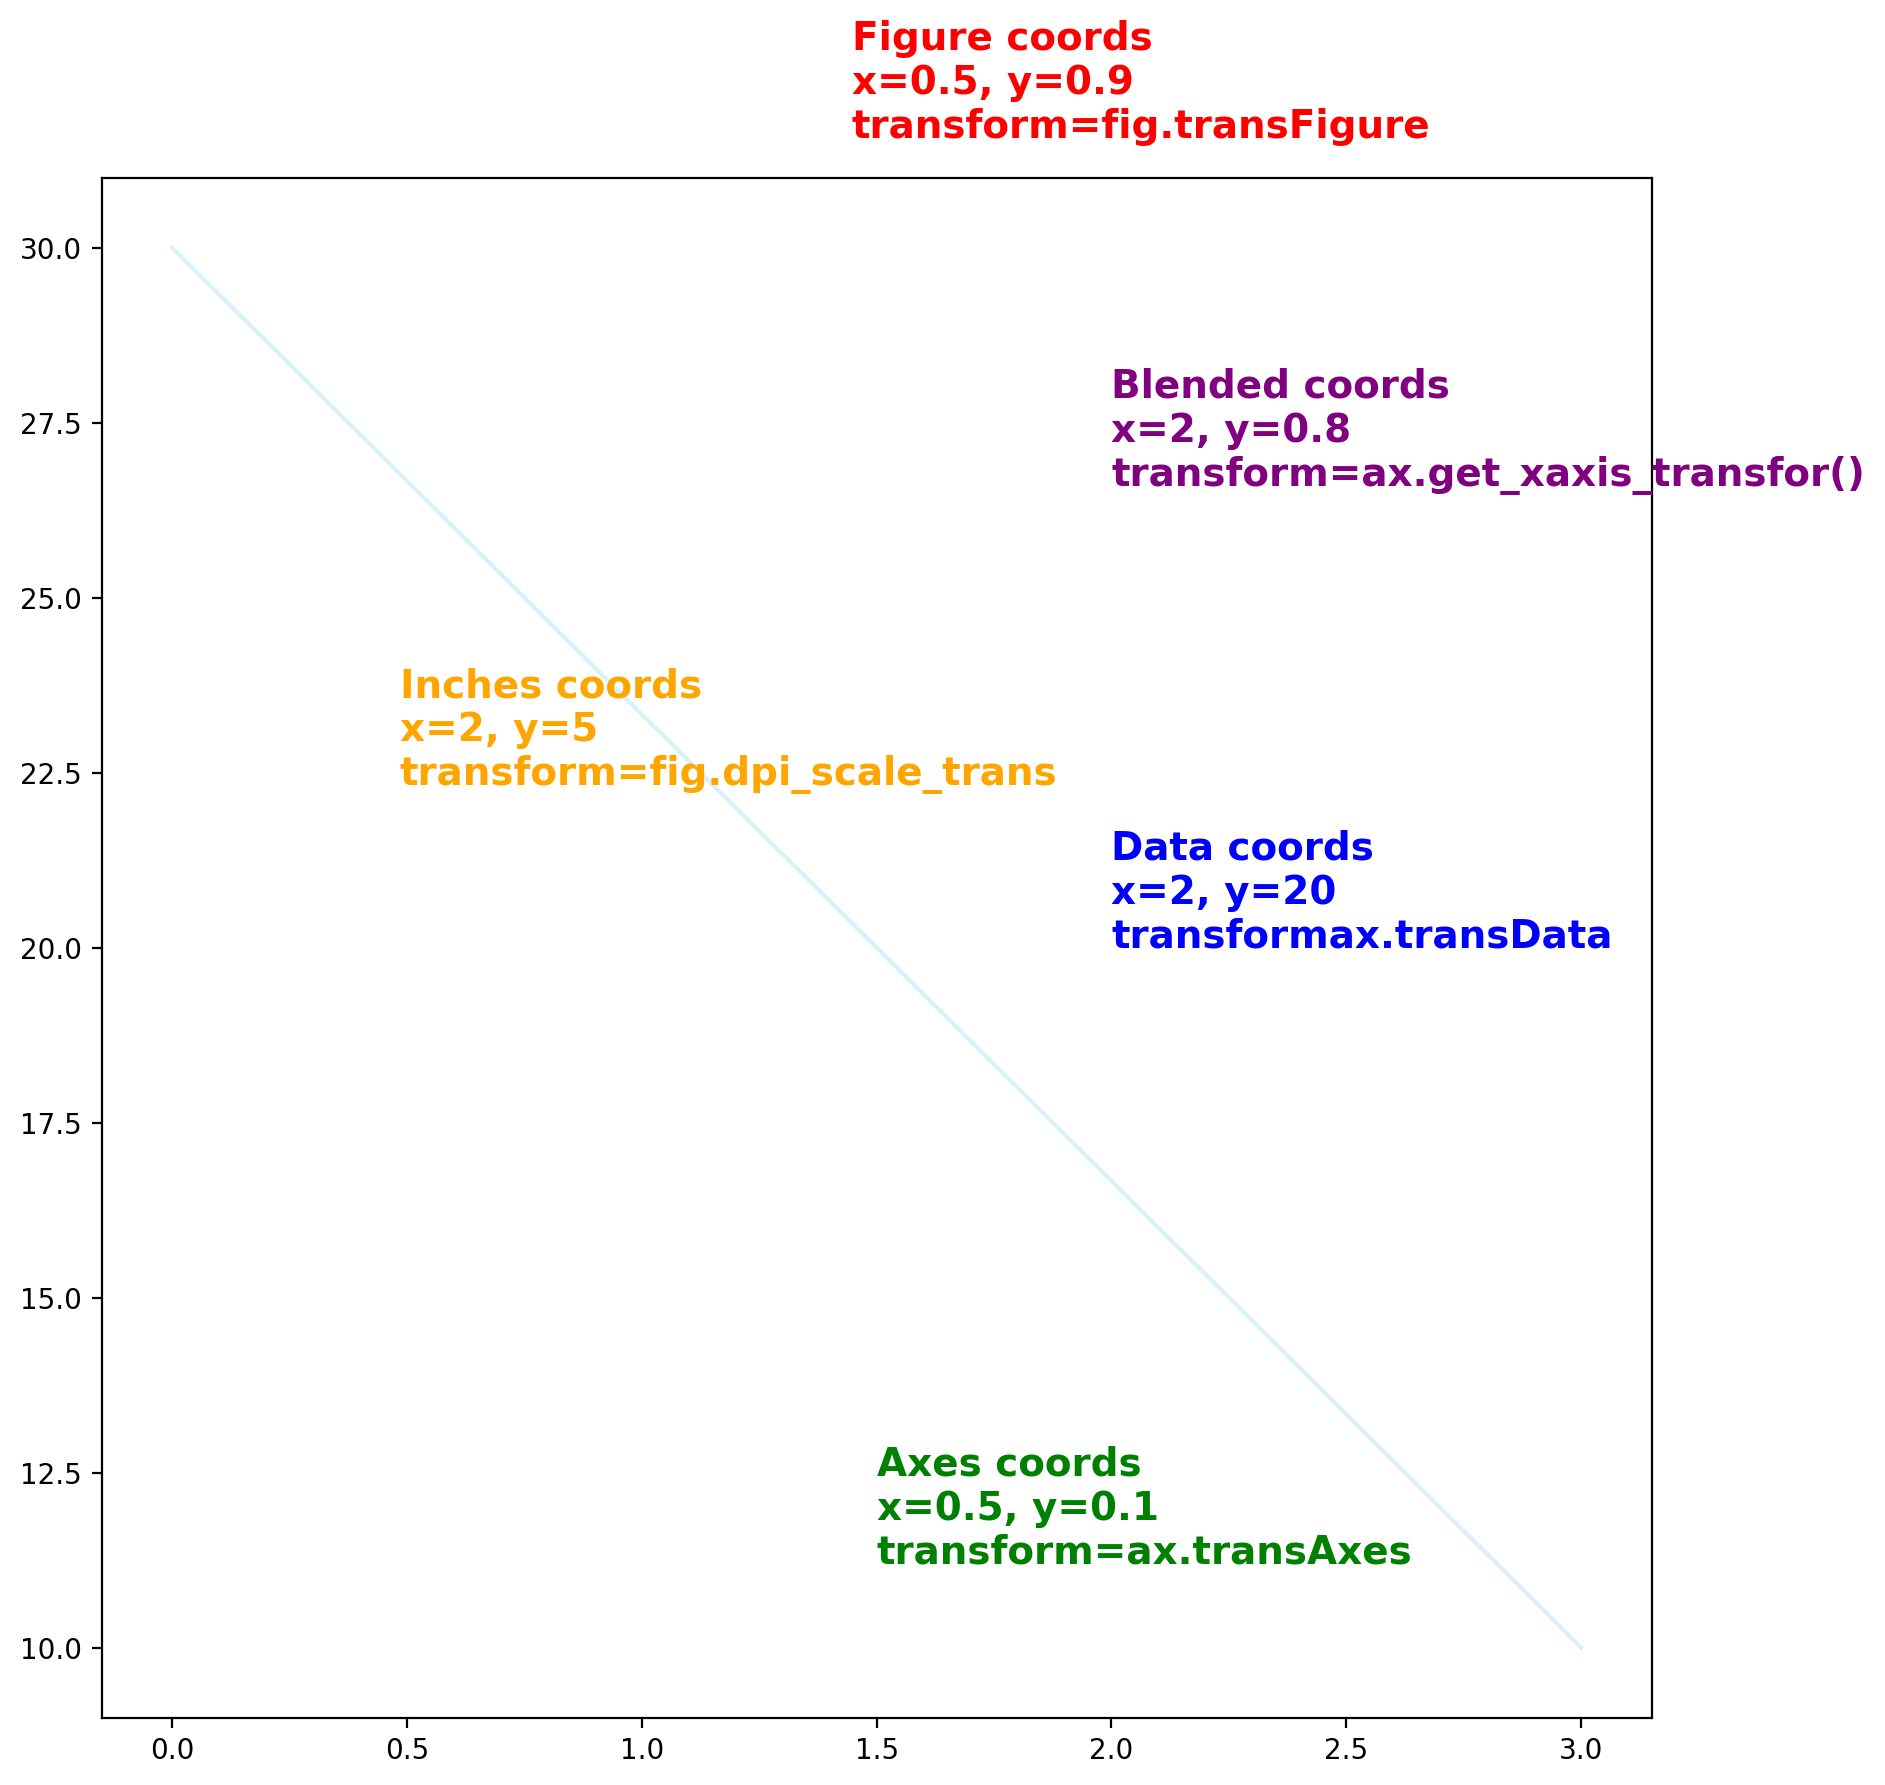

In [13]:
import matplotlib.pyplot as plt
from matplotlib.transforms import IdentityTransform

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 3], [30, 10], color='#d9f1fa')

# Data coordinates (default)
ax.text(
   2, 20,
   'Data coords\nx=2, y=20\ntransformax.transData',
   color='blue',
   fontweight='bold', fontsize=14)

# Axes coordinates
ax.text(
   0.5, 0.1,
   'Axes coords\nx=0.5, y=0.1\ntransform=ax.transAxes',
   transform=ax.transAxes,
   color='green',
   fontweight='bold', fontsize=14)

# Figure coordinates
ax.text(
   0.5, 0.9,
   'Figure coords\nx=0.5, y=0.9\ntransform=fig.transFigure',
   transform=fig.transFigure,
   color='red',
   fontweight='bold', fontsize=14)

# Blended transformation
trans = ax.get_xaxis_transform()  # x in data, y in axes
ax.text(
   2, 0.8,
   'Blended coords\nx=2, y=0.8\ntransform=ax.get_xaxis_transfor()',
   transform=trans,
   color='purple',
   fontweight='bold', fontsize=14)

# Inches coordinates
ax.text(
   2, 5,
   'Inches coords\nx=2, y=5\ntransform=fig.dpi_scale_trans',
   transform=fig.dpi_scale_trans,
   color='orange',
   fontweight='bold', fontsize=14)

plt.show()


Don't worry if this is confusing, we will go over each of these cases in the following sections.


## Quick reminder on figure and axes

In [Matplotlib](/matplotlib), the figure is the top-level container that **holds all the elements** of the chart. It is the canvas on which the chart is drawn. The axes are the **actual plot**. They are the region of the figure where the data is plotted.

One figure can contains **one or multiple axes**. In the case of multiple axes, they can be arranged in a grid, like in a subplot.

Here is an example of a figure with 2 (empty) axes:

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/graph/figure-explanations.png)

Reproduce it with:

```python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.show()
```


## Data coordinates: `ax.transData`

The data coordinate system is the one that is used to plot the data. For example, if you create a [scatter plot](/scatter-plot) with x=[1,2,3] and y=[4,5,6], the data coordinate system will be the one that goes from 1 to 3 on the x-axis and from 4 to 6 on the y-axis.

It's the default coordinate system used by [Matplotlib](/matplotlib) when you plot data. You can access it with `ax.transData`. Let's see an example:

_Note: we specify `transform=ax.transData` but since it's the default one, you can omit it._


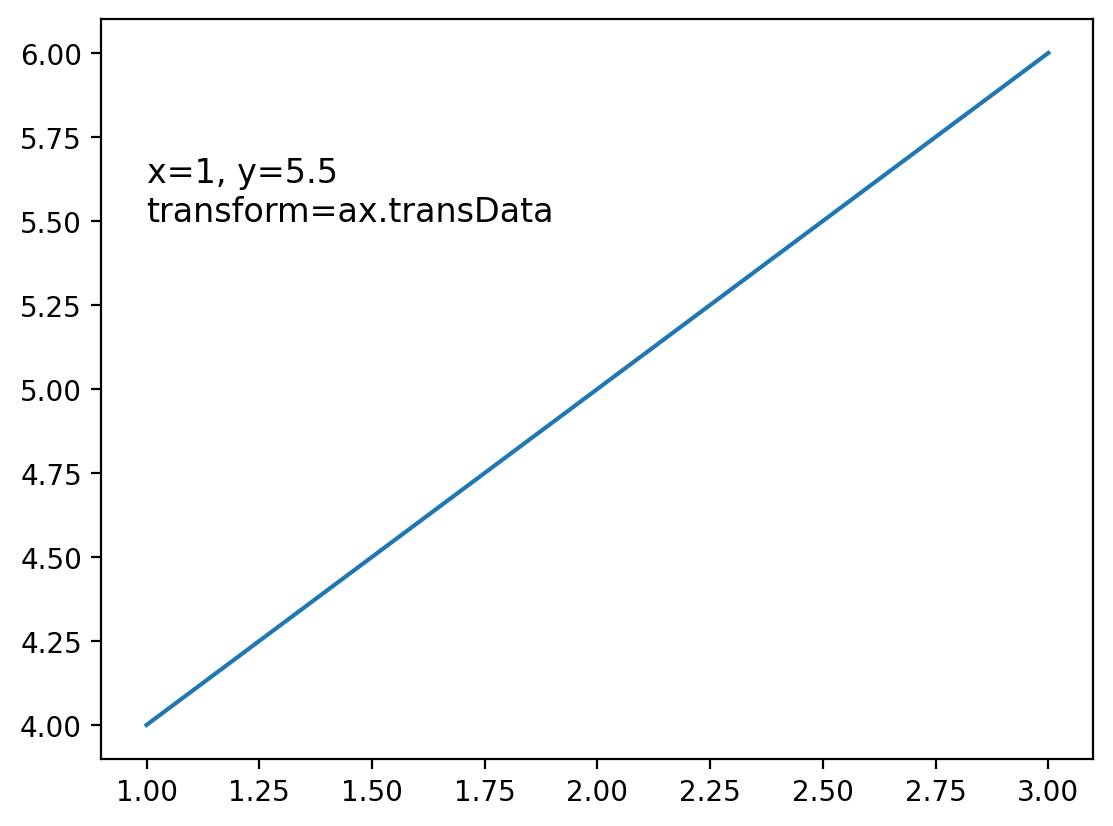

In [3]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots()
ax.plot(x, y)

# Data coordinates
ax.text(
   x=1, y=5.5,
   s='x=1, y=5.5\ntransform=ax.transData',
   transform=ax.transData,
   fontsize=12
)

plt.show()

## Axes coordinates: `ax.transAxes`

The axes coordinate system is the one that goes from 0 to 1 on each axis.

In this case, the positions will be relative to the axes: `(0,0)` is the **bottom-left** corner of the axes, and `(1,1)` is the **top-right** corner.


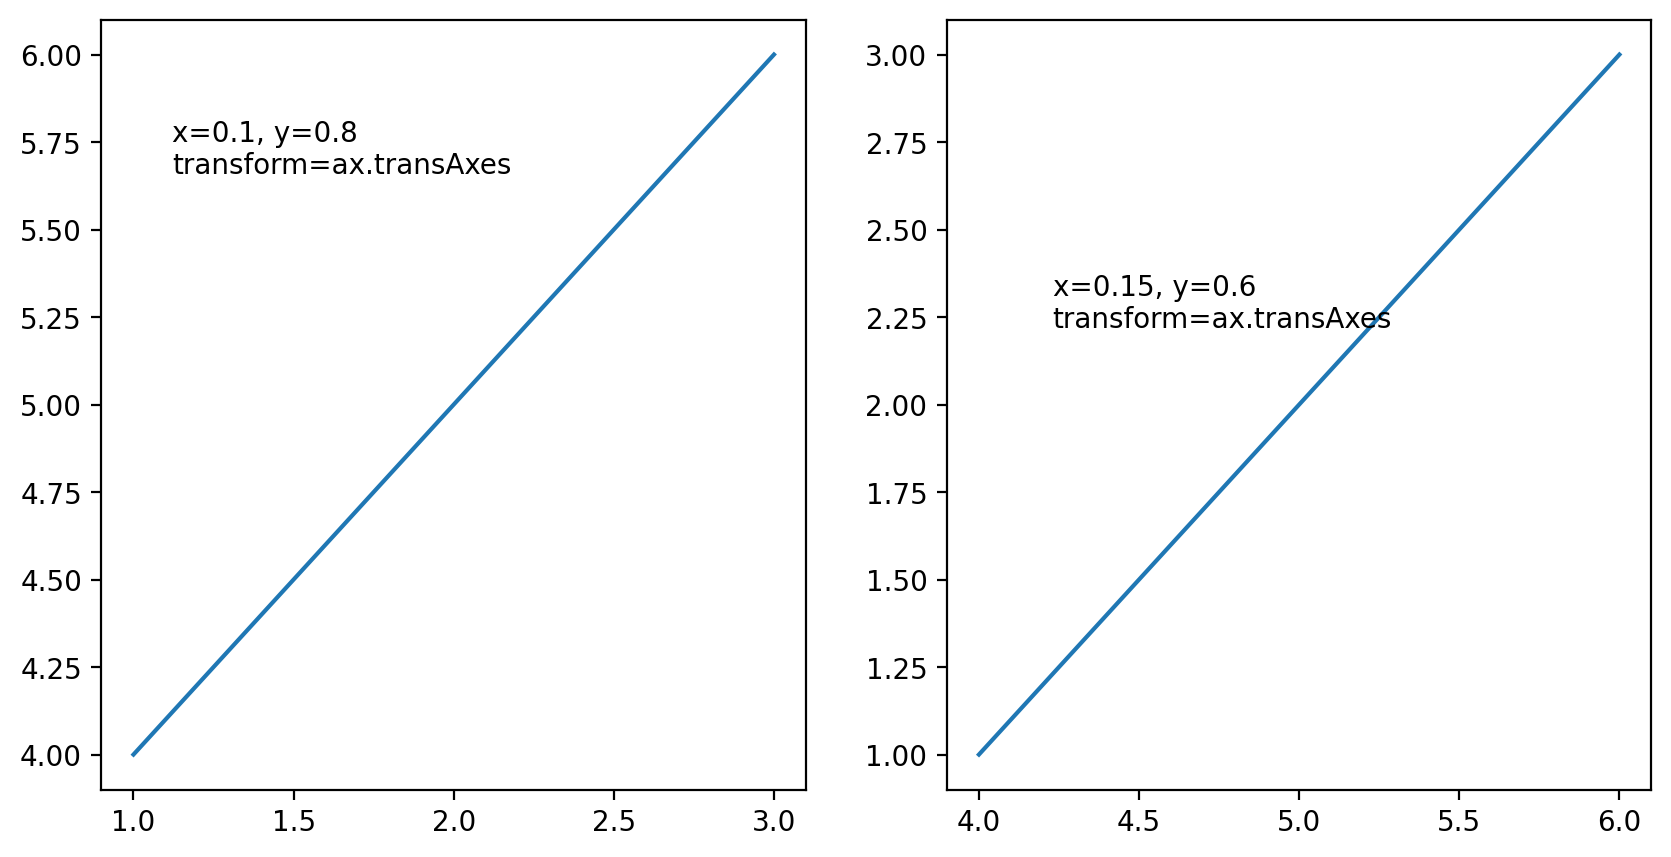

In [4]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Axes coordinates for left subplot
ax[0].text(
   x=0.1, y=0.8,
   s='x=0.1, y=0.8\ntransform=ax.transAxes',
   transform=ax[0].transAxes,
   fontsize=10,
)

# Axes coordinates for right subplot
ax[1].text(
   x=0.15, y=0.6,
   s='x=0.15, y=0.6\ntransform=ax.transAxes',
   transform=ax[1].transAxes,
   fontsize=10,
)

plt.show()

## Figure coordinates: `fig.transFigure`

The **figure coordinate system** spans from **0 to 1** across the entire figure. This is the most intuitive system: the **bottom left corner** is **(0,0)**, and the **top right corner** is **(1,1)**.

It is particularly useful for adding **annotations** that are **absolute** to the figure, such as a **title** or **credit**.

An even cooler feature is that you can specify values **above 1** and **below 0**. For instance, to add a title slightly above the figure's top, you can use **`(0.5, 1.1)`** for the position.

_Note: The primary difference between **`ax.text()`** and **`fig.text()`** lies in the **coordinate system** used, meaning the following are equivalent:_

```python
fig, ax = plt.subplots()

# This line
ax.text(0.5, 0.5, 'text', transform=fig.transFigure)

# Is equivalent to this one
fig.text(0.5, 0.5, 'text')
```


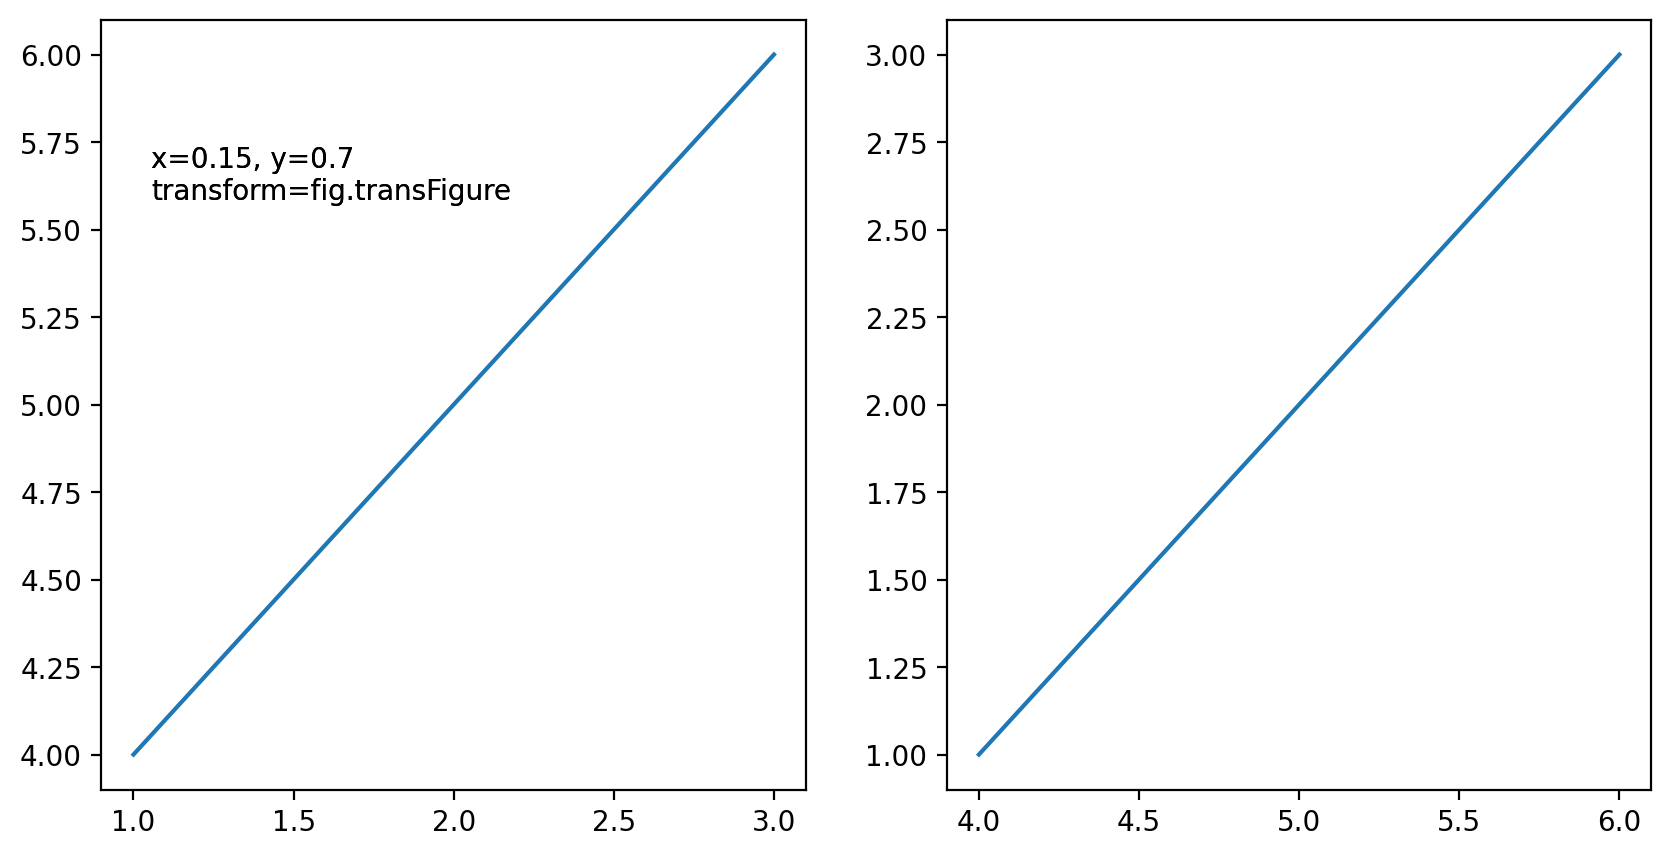

In [5]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Figure coordinates
ax[0].text(
   x=0.15, y=0.7,
   s='x=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

# This is equivalent to the previous one: it will be displayed in the same position
ax[1].text(
   x=0.15, y=0.7,
   s='x=0.15, y=0.7\ntransform=fig.transFigure',
   transform=fig.transFigure,
   fontsize=10,
)

plt.show()

## Relative to x-axis and to y-axis

Thanks to the `ax.get_xaxis_transform()` and `ax.get_yaxis_transform()` functions, you can specify a position relative to the x-axis or the y-axis while the other coordinate is in data coordinates.


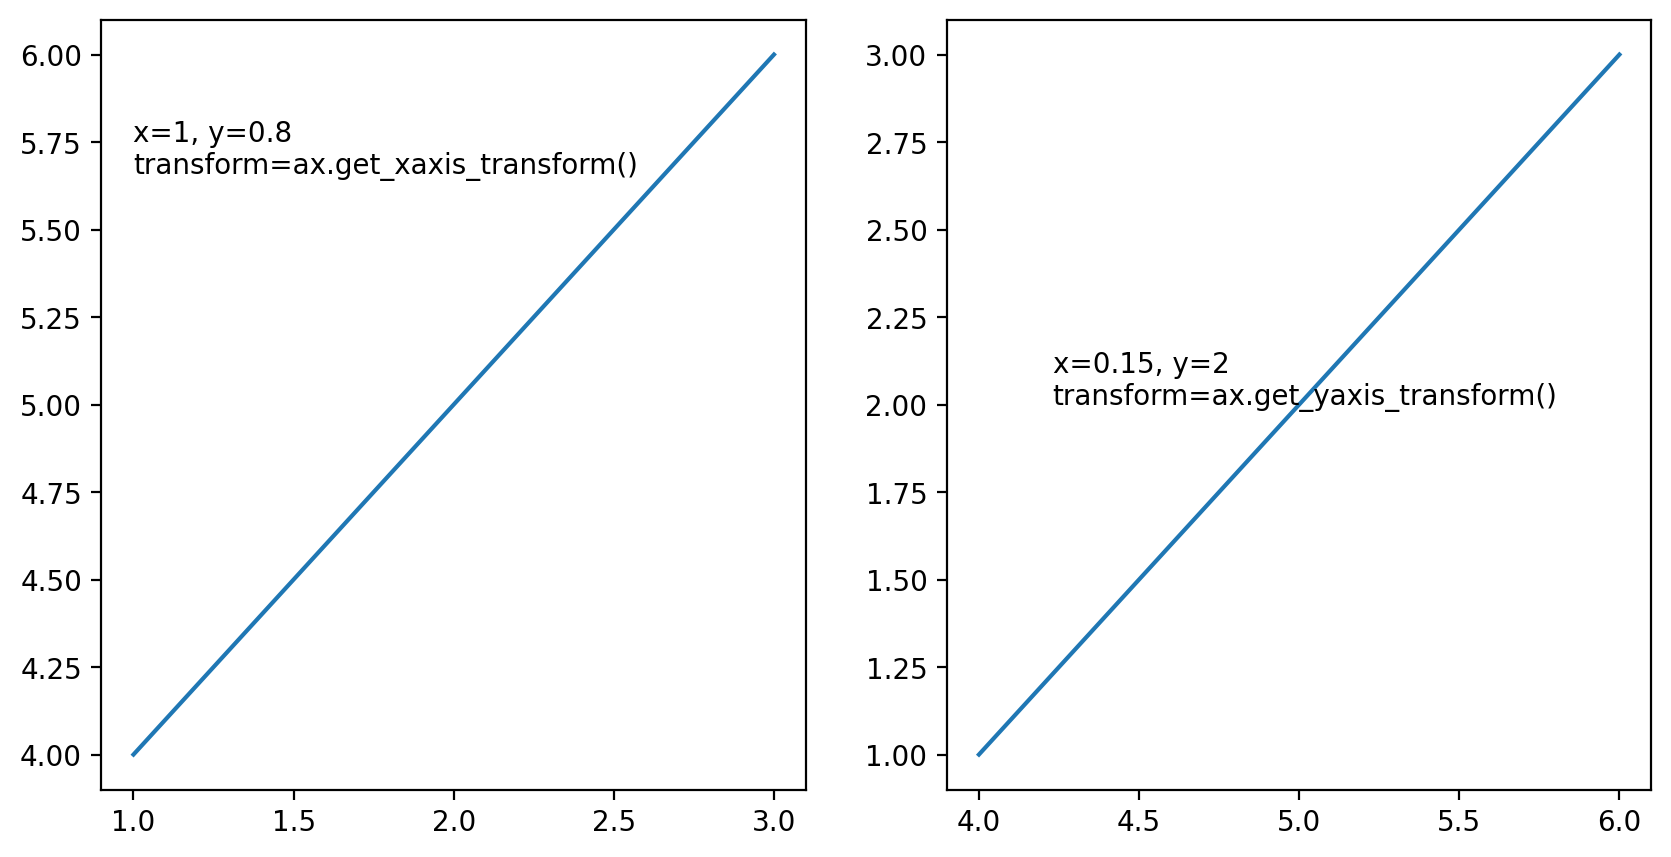

In [6]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(y, x)

# Semi-blended transformation: x in data coordinates, y in axes coordinates
ax[0].text(
   x=1, y=0.8,
   s='x=1, y=0.8\ntransform=ax.get_xaxis_transform()',
   transform=ax[0].get_xaxis_transform(),
   fontsize=10,
)

# Semi-blended transformation: y in data coordinates, x in axes coordinates
ax[1].text(
   x=0.15, y=2,
   s='x=0.15, y=2\ntransform=ax.get_yaxis_transform()',
   transform=ax[1].get_yaxis_transform(),
   fontsize=10,
)

plt.show()

## Physical coordinates: `fig.dpi_scale_trans`

Sometimes we want an object to be a certain physical size on the plot: for example, a **circle of 1cm radius**. This is what the `fig.dpi_scale_trans` is for. It allows you to specify the size of an object in **inches**.


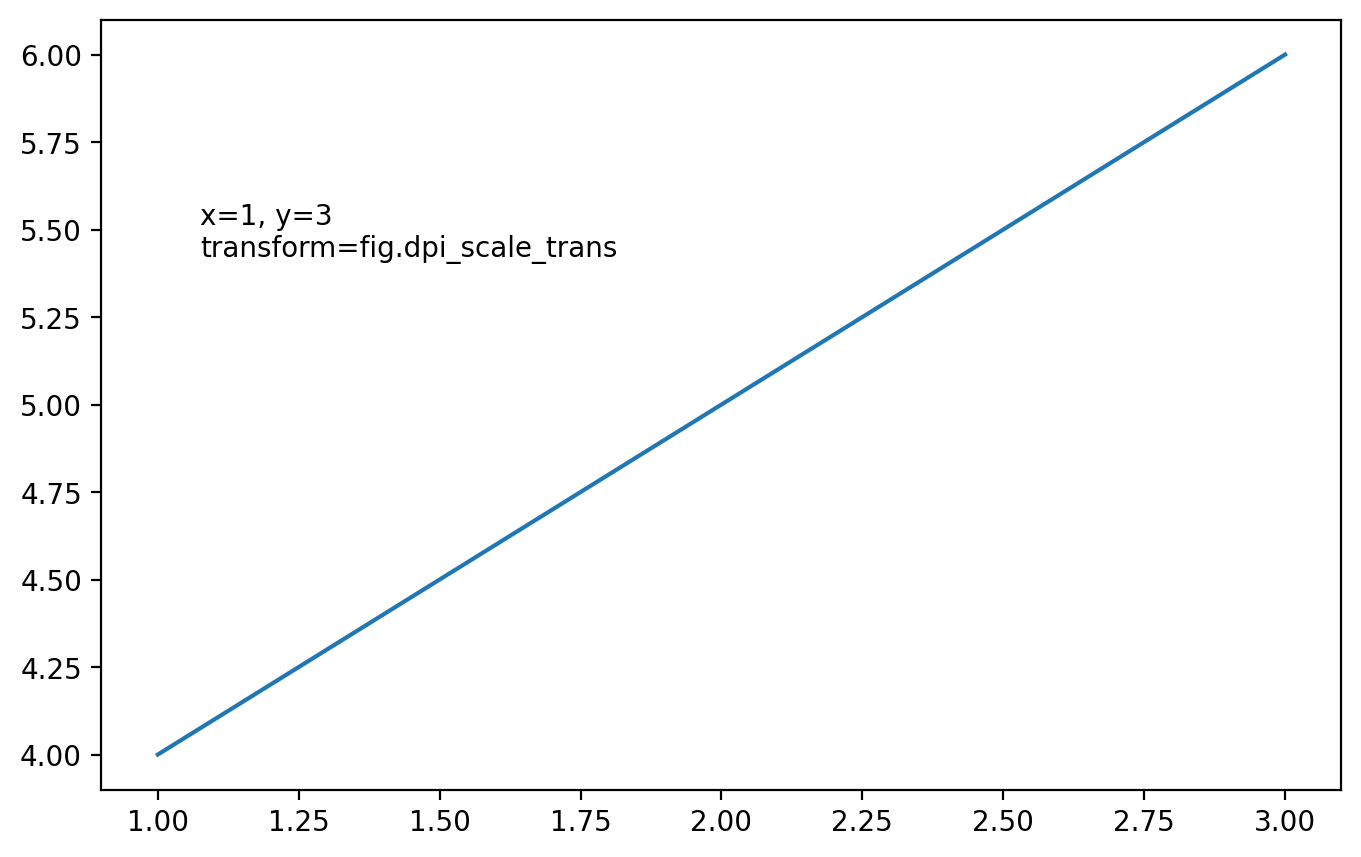

In [7]:
x = [1, 2, 3]
y = [4, 5, 6]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y)

# Position in inches from the lower-left (x=0,y=0) corner of the figure
ax.text(
   x=1, y=3,
   s='x=1, y=3\ntransform=fig.dpi_scale_trans',
   transform=fig.dpi_scale_trans,
   fontsize=10,
)

plt.show()

## Going further

You might be interested in:

- create annotations with [different styles](/advanced-custom-annotations-matplotlib)
- how to create [rounded arrows](/how-to-create-and-custom-arrows-matplotlib)
- customize [fonts in matplotlib](/custom-fonts-in-matplotlib)
- how to [manage subplots](/194-split-the-graphic-window-with-subplot)
